# Анализ данных и проверка гипотез сервиса GoFast для роста бизнеса

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st


#### Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('C:/Users/Student/Desktop/users_go.csv')
    rides = pd.read_csv('C:/Users/Student/Desktop/rides_go.csv')
    subscript = pd.read_csv('C:/Users/Student/Desktop/subscriptions_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscript = pd.read_csv('/datasets/subscriptions_go.csv')

#### Шаг 2. Предобработка данных

In [3]:
display(users)
display(users.describe())
display(users.info())
display(users.duplicated().value_counts())
users = users.drop_duplicates().reset_index(drop=True)
for i in users:
    print(i)
    display(users[i].unique())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

False    1534
True       31
dtype: int64

user_id


array([   1,    2,    3, ..., 1532, 1533, 1534])

name


array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

age


array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43])

city


array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

subscription_type


array(['ultra', 'free'], dtype=object)

##### Проверили датасет users. С типами данных все в порядке. Были обнаружены и удалены 31 дубликат. Неявных дубликатов не обнаружено

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

False    18068
dtype: int64

user_id


array([   1,    2,    3, ..., 1532, 1533, 1534])

distance


array([4409.9191402 , 2617.59215346,  754.15980696, ..., 3826.1855073 ,
       2902.30866066, 2371.71119224])

duration


array([25.59976897, 15.81687145,  6.23211346, ..., 18.43505138,
       16.6743622 , 15.89391697])

date


array(['2021-01-01', '2021-01-18', '2021-04-20', '2021-08-11',
       '2021-08-28', '2021-10-09', '2021-10-19', '2021-11-06',
       '2021-11-14', '2021-11-22', '2021-12-14', '2021-12-22',
       '2021-03-15', '2021-03-18', '2021-03-23', '2021-04-08',
       '2021-04-13', '2021-06-20', '2021-07-02', '2021-07-18',
       '2021-08-03', '2021-10-27', '2021-12-18', '2021-01-31',
       '2021-02-24', '2021-02-26', '2021-04-12', '2021-05-07',
       '2021-05-21', '2021-05-22', '2021-07-04', '2021-07-07',
       '2021-07-14', '2021-09-04', '2021-02-10', '2021-02-16',
       '2021-06-06', '2021-06-27', '2021-07-06', '2021-07-17',
       '2021-08-14', '2021-10-08', '2021-10-24', '2021-10-30',
       '2021-11-25', '2021-03-01', '2021-03-13', '2021-03-25',
       '2021-04-24', '2021-05-08', '2021-05-30', '2021-07-24',
       '2021-08-10', '2021-10-07', '2021-02-25', '2021-05-04',
       '2021-05-14', '2021-05-17', '2021-08-15', '2021-09-27',
       '2021-11-18', '2021-12-07', '2021-12-08', '2021-

count    18068.000000
mean       229.754352
std        735.936479
min          0.085552
25%        135.464046
50%        170.852249
75%        215.496668
max      14422.015489
dtype: float64

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


,user_id,distance,duration,date,month
6531,701,114.877176,0.5,2021-08-31,8
6570,704,114.877176,0.5,2021-10-14,10
6680,712,114.877176,0.5,2021-03-04,3
6695,713,114.877176,0.5,2021-02-25,2
6768,718,114.877176,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,114.877176,0.5,2021-01-19,1
17242,1477,114.877176,0.5,2021-01-12,1
17314,1483,114.877176,0.5,2021-03-06,3
17505,1496,114.877176,0.5,2021-02-14,2


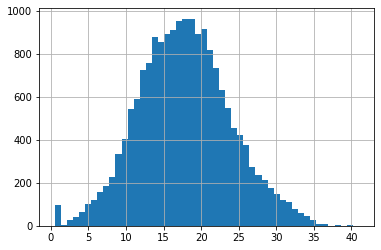

In [4]:
display(rides)
display(rides.describe())
display(rides.info())
display(rides.duplicated().value_counts())

for i in rides:
    print(i)
    display(rides[i].unique())
    
rides['date'] = pd.to_datetime(rides['date'])
rides['month'] = pd.DatetimeIndex(rides['date']).month

b = (rides['distance']/rides['duration'])
display(b.describe())

display(rides[rides['duration']<2])  

rides['duration'].hist(range=(0.5, 41), bins=50)

a = (rides['distance']/rides['duration']).mean().round(6)

rides.loc[rides['duration']<=2, 'distance'] = a*0.5
display(rides[rides['duration']<2]) 

##### В датафрейме ride отсутвуют дубликаты и пропуски. С типами все в порядке кроме даты -ее переводим в другой формат. Добавляем столбец с месяцем поездки. Наблюдаем 91 аномальное значание продолжительности на 0.5 минуты.Наблюдаем, что дистанция за пол минуты не соответствует расстоянию. Заменили ее на мадианное значение скорости умноженное на время. Максимальная скорость 423 метра в минуту - что примерно 24-25 км в час - соответствует действительности.

In [5]:
display(subscript)
display(subscript.describe())
display(subscript.info())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

##### с данным фреймом subscript все ок - предобработка не требуется. Пропуски и дубликаты остутвуют, с типами все в порядке. Тарифы и типы совпадают с документацией

#### Шаг 3. Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

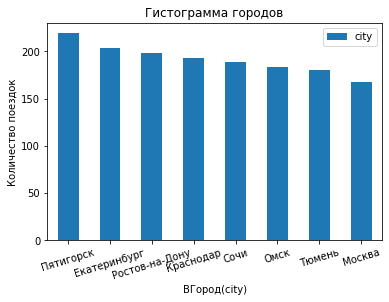

In [6]:
display(users['city'].value_counts())
users['city'].value_counts().plot(x="index", y="count", kind="bar", rot=17, legend=True);
plt.title("Гистограмма городов")
plt.ylabel('Количество поездок')
plt.xlabel('ВГород(city)');

##### В датасете представлены данные из 8 городов.  Чаще всего встречаются пользователи из Пятигорска и реже всего из Москвы

free     835
ultra    699
Name: subscription_type, dtype: int64

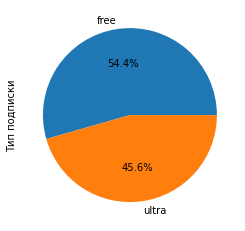

In [7]:
display(users['subscription_type'].value_counts())
users['subscription_type'].value_counts().plot(kind="pie", label="Тип подписки", autopct='%1.1f%%');

##### В датасете больше половины пользователей без подписки. Разница между ними около 15%

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

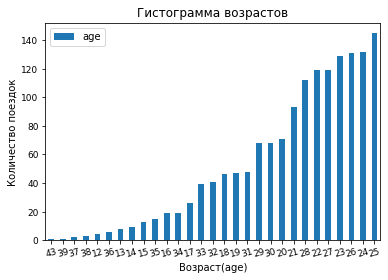

In [8]:
display(users['age'].value_counts())
display(users['age'].describe())
users['age'].value_counts().sort_values().plot(x="index", y="count", kind="bar", rot=15, legend=True, fontsize=9);
plt.title("Гистограмма возрастов")
plt.ylabel('Количество поездок')
plt.xlabel('Возраст(age)');

<AxesSubplot:ylabel='Возраст'>

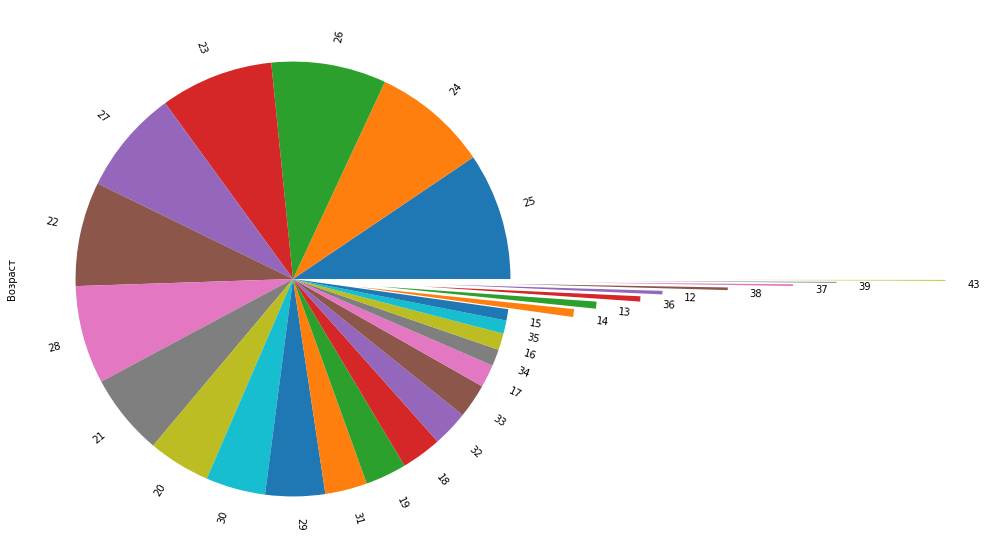

In [9]:
a = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.4,0.6,0.7,1,1.3,1.5,2)
users['age'].value_counts().plot(kind="pie", label="Возраст", figsize=(10, 10), rotatelabels=True, explode=a)

##### В датасете пользователи от 12 до 43 лет, больше всего в интервале от 20 до 30 лет. Средний и наиболее часто встречающийся возвраст - 25 лет.

,distance
user_id,
1309,4287.519387
850,4004.838037
644,3939.773328
465,3917.559390
381,3905.037651
...,...
1433,1991.245493
712,1829.176381
1172,1822.397599


,distance
count,1534.000000
mean,3054.613640
std,334.605054
min,1630.788427
25%,2850.826561
50%,3068.290250
75%,3277.547670
max,4287.519387


count    18068.000000
mean      3044.379345
std       1126.219069
min          0.855683
25%       2526.006860
50%       3123.328872
75%       3756.620854
max       7066.003772
Name: distance, dtype: float64

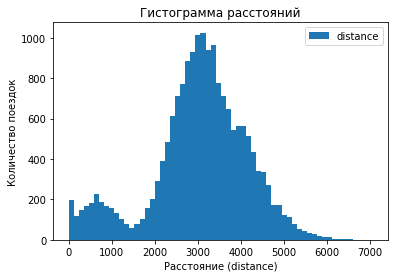

In [10]:
mean_dis = rides.pivot_table(index='user_id', values='distance', aggfunc='mean')
display(mean_dis.sort_values(by='distance', ascending=False))
display(mean_dis.describe())
display(rides['distance'].describe())
rides['distance'].plot(x="index", y="distance", kind='hist', legend=True, bins=60);
plt.title("Гистограмма расстояний")
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние (distance)');

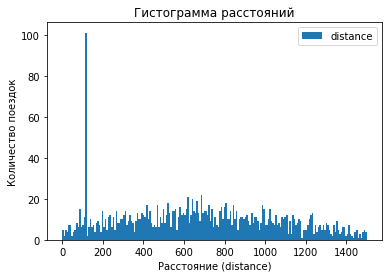

In [11]:
rides['distance'].plot(x="index", y="distance", kind='hist', legend=True, bins=200, range=(0, 1500));
plt.title("Гистограмма расстояний")
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние (distance)');

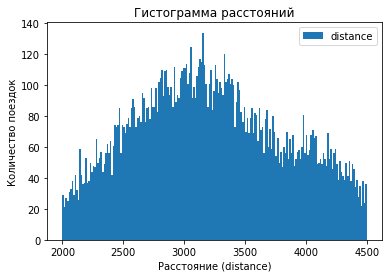

In [12]:
rides['distance'].plot(x="index", y="distance", kind='hist', legend=True, bins=200, range=(2000, 4500));
plt.title("Гистограмма расстояний")
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние (distance)');

##### Рассматривая все поездки датасета наблюдаем диапазон от 0.85 до 7066 метров. В среднем дистанция поездки около 3 км. На общей гистограмме видим 2 моды - примерно 500 метров и 3 км, но в приближении первая мола - ничто иное как короткие поездки по 0,5 минуты, которые обусловлены либо неиспраностью самоката либо пользователь передумал ехать. Большая часить поездок освершается на дистанции от 2.5 до 3.7 км. Мы нашли среднее расстояние поездки каждого пользователя. Эти данные лежат в диапазоне от 1630 до 4287 метров. Больше всех в среднем проезжает пользователь с id 1309, а меньше всех 908

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

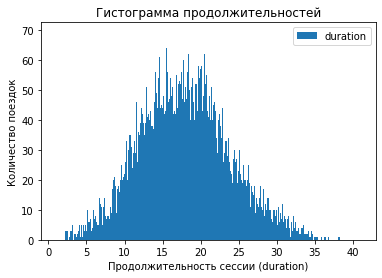

In [13]:
display(rides['duration'].describe())
rides['duration'].plot(x="index", y="duration", kind='hist', legend=True, bins=900, range=(1, 41));
plt.title("Гистограмма продолжительностей")
plt.ylabel('Количество поездок')
plt.xlabel('Продолжительность сессии (duration)');

##### Рассматривая все поездки датасета наблюдаем диапазон от 0.5 до 40.8 минут. В среднем длительность поездки около 17 минут. Большая часить поездок освершается по времени от 13 до 21 минуты

#### Шаг 4. Объединение данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

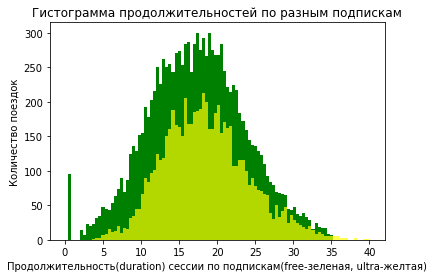

In [14]:
data = users.merge(rides, on='user_id')
data = data.merge(subscript, on='subscription_type')
display(data.info())
data_free = data.query('subscription_type == "free"')
data_ultra = data.query('subscription_type == "ultra"')

display(data_free['duration'].describe())
display(data_ultra['duration'].describe())

data_free['duration'].plot(x="index", y="duration", kind='hist', 
                           bins=100, range=(0, 40), color='green');
data_ultra['duration'].plot(x="index", y="duration", kind='hist', 
                            bins=100, range=(0, 40), color='yellow', alpha=0.7);
plt.title("Гистограмма продолжительностей по разным подпискам")
plt.ylabel('Количество поездок')
plt.xlabel('Продолжительность(duration) сессии по подпискам(free-зеленая, ultra-желтая)');

count    11568.000000
mean      3004.447699
std       1258.239806
min          0.855683
25%       2340.417960
50%       3088.526878
75%       3877.463010
max       7066.003772
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

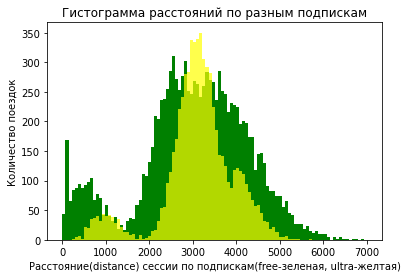

In [15]:
display(data_free['distance'].describe())
display(data_ultra['distance'].describe())
data_free['distance'].plot(x="index", y="duration", kind='hist', 
                           bins=100, range=(0,7000), color='green');
data_ultra['distance'].plot(x="index", y="duration", kind='hist', 
                            bins=100, range=(0,7000), color='yellow', alpha=0.7);
plt.title("Гистограмма расстояний по разным подпискам")
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние(distance) сессии по подпискам(free-зеленая, ultra-желтая)');

<AxesSubplot:ylabel='Тарифы'>

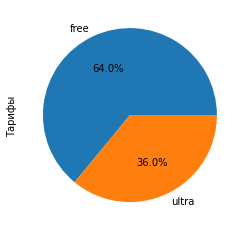

In [16]:
data['subscription_type'].value_counts().plot(kind="pie", label="Тарифы", autopct='%1.1f%%')

##### Сравнивая 2 тарифа - мы наблюдаем примерно одинаковые распределения и практичесеки идентичные средние значения продолжительности поездок  и расстояния. Так же видим, что поездок соверншенных по тарифу free почти в 2 раза больше чем поездок совершенных по тарфу ultra

#### Шаг 5. Подсчёт выручки

In [17]:
data1 = data.pivot_table(index=['user_id', 'month', 'subscription_type'], 
                         values=['distance', 'duration'], aggfunc=['sum', 'count'])
data1.columns = data1.columns.droplevel(0)
data1.columns = ['distance', 'duration', 'count', 'revenue']
data1['duration'] = np.ceil(data1['duration']) 
data1.reset_index(inplace= True)

data1.loc[data1['subscription_type']=='ultra', 'revenue'] = data1['duration']*6+199
data1.loc[data1['subscription_type']=='free', 'revenue'] = data1['duration']*8+data1['count']*50
data1

,user_id,month,subscription_type,distance,duration,count,revenue
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,4,ultra,754.159807,7.0,1,241.0
2,1,8,ultra,6723.470560,45.0,2,469.0
3,1,10,ultra,5809.911100,32.0,2,391.0
4,1,11,ultra,7003.499363,54.0,3,523.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,25.0,2,300.0
11327,1534,8,free,7622.453034,48.0,2,484.0
11328,1534,9,free,4928.173852,23.0,1,234.0
11329,1534,11,free,13350.015305,77.0,4,816.0


#### Шаг 6. Проверка гипотез

In [18]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


##### Сравнивая 2 выборки по времени поездок по разным тарифам - мы выдвигаем гипотезу, что обе выборки имеют либо одинковые значения по продолжительности и альтернативную, что пользоатели с подпиской - больше. Уровень статистической значимаоти 0.05. Получаем, что нулевая гипотеза отвергнута, значит пользователи по подписке в среднем тратят больше времни на поездки и пользователи с подпиской «выгоднее» для компании.

In [19]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


##### Нулевую гипотезу опровергнуть не удалось, значит среднее время поездки у пользователей с подпиской примерно равно 3130м.

In [20]:
ultra_rev = data1.loc[data1['subscription_type']=='ultra', 'revenue']
free_rev = data1.loc[data1['subscription_type']=='free', 'revenue']
results = st.ttest_ind(ultra_rev, free_rev, alternative = 'greater')
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


##### Нулевая гипотезa, что пользователи по подписке помесячно делают фирме столько же выручки, что без подписки опровергается. Следоваетельно вероятно что пользователи с подпиской делат больше остается в силе

##### Для сравнения количества обращений в тех. поддержку пользователей до обновления сервера и после нам понадобится тест о равенстве средних для зависимых (парных) выборок st.ttest_rel(before, after)